In [21]:


# 보험 청구를 할 것인지 예측하는 문제
# binary classification competition

In [43]:

#metric 이해
"""

아키텍처 이해가 부족해서 시작조차 어려웠음 서빙


지니계수와
ROC


알고 한다 -> 단편적, 이분법적, 단순함이 많이 포함되어있음 정량적 지표이기는 함 영어로따지면 잘 듣고 잘 말하기는 하나
 내용 이해를 잘 못한 상태일 수 있음

이해하고 한다 -> 감정적 ,실전적, 총괄적인 앎 정량적 지표+ 정성적 지표인 느낌. 단순히 앎에
   그치는 게 아니라 이해가 있어야 실력을 늘릴 수 있다. 감정을 이해하지 못하면 돈을 못버는 것처럼



1-frac_pos / 2 가 maximum

perfect score =0.5

로렌츠 곡선 커브의 면적을 삼각형면적으로 나눈 것이 지니계수

왜 지니계수를 쓰는가?

gini = 2x AUC -1 인데
AUC는
random guessing는 0.5인데

지니계수는 random guessing이 0이다 ->?

숫자적으로 보기 편해서?

그냥 accuracy로 하면 모델을 올바르게 평가하기가 어렵다

ROC - AUC CURVE 는 threshold값을 0.1,0.2, 등등으로 정했을 때 TP RATE와 FP RATE를 PLOT 하는것
 대각선의 0.5 기울기가 1인 값이 완벽한 값이고 이와 가까운 값을 구하기 위해서 사용하는ㄱ ㅓㅅ

imbalance한 target을 가지고있을때 accuracy로 모델 성능을 평가하기 어려우므로

 얻게될 prediction 값 샘플에 대한 이 모델의 값이 0.6이면 0.5일때 class 1이라고 할때 이 샘플은 1인데
 threshold를 0.1로 둘 수도있고 0.2로 둘 수도 있고
 그러면서
 0.1,0.2,0.3 ... 하면서
 이 curve 면적의 대각선 밑의


  threshold값을 구하는 건데 thres

GINI 계수는 이와조금다르지만 비슷한 목적으로

 random guessing은 0이고 perfect guessing은


"""

'\n\n아키텍처 이해가 부족해서 시작조차 어려웠음 서빙\n\n\n지니계수와\nROC\n\n\n알고 한다 -> 단편적, 이분법적, 단순함이 많이 포함되어있음 정량적 지표이기는 함 영어로따지면 잘 듣고 잘 말하기는 하나\n 내용 이해를 잘 못한 상태일 수 있음\n\n이해하고 한다 -> 감정적 ,실전적, 총괄적인 앎 정량적 지표+ 정성적 지표인 느낌. 단순히 앎에\n   그치는 게 아니라 이해가 있어야 실력을 늘릴 수 있다. 감정을 이해하지 못하면 돈을 못버는 것처럼\n\n\n\n1-frac_pos / 2 가 maximum\n\nperfect score =0.5\n\n로렌츠 곡선 커브의 면적을 삼각형면적으로 나눈 것이 지니계수\n\n왜 지니계수를 쓰는가?\n\ngini = 2x AUC -1 인데\nAUC는\nrandom guessing는 0.5인데\n\n지니계수는 random guessing이 0이다 ->?\n\n숫자적으로 보기 편해서?\n\n그냥 accuracy로 하면 모델을 올바르게 평가하기가 어렵다\n\nROC - AUC CURVE 는 threshold값을 0.1,0.2, 등등으로 정했을 때 TP RATE와 FP RATE를 PLOT 하는것\n 대각선의 0.5 기울기가 1인 값이 완벽한 값이고 이와 가까운 값을 구하기 위해서 사용하는ㄱ ㅓㅅ\n\nimbalance한 target을 가지고있을때 accuracy로 모델 성능을 평가하기 어려우므로\n\n 얻게될 prediction 값 샘플에 대한 이 모델의 값이 0.6이면 0.5일때 class 1이라고 할때 이 샘플은 1인데\n threshold를 0.1로 둘 수도있고 0.2로 둘 수도 있고\n 그러면서\n 0.1,0.2,0.3 ... 하면서\n 이 curve 면적의 대각선 밑의\n\n\n  threshold값을 구하는 건데 thres\n\nGINI 계수는 이와조금다르지만 비슷한 목적으로\n\n random guessing은 0이고 perfect guessing은\n\n\n'

In [3]:
# This notebook aims at getting a good instight in the data for the PorteSeguro Competition.
# Besides that , it gives some tips and tricks to prepare your data for modeling . The notebook consists of the following main sections


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 100개의 피쳐 중 특정 피쳐에서 1이 99개고 0이 1개라면  -> 그 정보에서 얻을 게 별로 없으므로 제거한다
#
from sklearn.feature_selection import VarianceThreshold
# 모델마다 중요도 어느정도 메서드로 구현된것
# 0로 했을 때 피쳐가 중요하지 않았는데
# 1로 하면 피쳐가 중요해진다면 학습을 해야한다
# 피쳐하나에 모델 한개이므로 피쳐 천개만개면 모델도 천개만개 만들어야된다
#
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# random sample 시 imbalance 가 불안하다면
from sklearn.model_selection import StratifiedKFold

In [4]:
DEBUG = True
if DEBUG:
    NROWS = 50000
else:
    NROWS = None

In [5]:
fold = StratifiedKFold(n_splits=10, random_state=1980, shuffle=True)


In [6]:
train = pd.read_csv('C:/Users/tjdal/PycharmProjects/Kaggle/PortoSeguro/input/train.csv', nrows=NROWS)
test = pd.read_csv('C:/Users/tjdal/PycharmProjects/Kaggle/PortoSeguro/input/test.csv',nrows=NROWS)
train = train.sample(frac=0.2)

In [7]:
"""
for trn_idx , val_idx in fold.split(train, train['target']):
    break
# 이렇게 하면 깔끔한 Stratified idx가 뽑힌다 imbalance 방지용으로
# Stratified sample이란 모집단의 하위집단이 각각 적절하게 대표되도록 하는 표본
#train = train.iloc[trn_idx]
"""

"\nfor trn_idx , val_idx in fold.split(train, train['target']):\n    break\n# 이렇게 하면 깔끔한 Stratified idx가 뽑힌다 imbalance 방지용으로\n# Stratified sample이란 모집단의 하위집단이 각각 적절하게 대표되도록 하는 표본\n#train = train.iloc[trn_idx]\n"

In [8]:
train.head()



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
37660,94428,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.3,0.0,0.871063,11,1,-1,0,-1,6,1,1,0,1,33,3,0.387298,0.876035,-1.000000,3.741657,0.0,0.7,0.6,3,2,6,2,10,3,4,5,1,5,7,0,1,0,0,0,0
40024,100294,0,5,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.9,0.3,0.819680,7,1,-1,0,-1,0,1,1,2,1,23,3,0.400000,0.945239,0.397492,3.464102,0.6,0.5,0.8,2,0,8,5,10,4,5,7,2,5,11,0,1,1,0,0,1
37590,94216,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.4,0.818917,11,1,-1,0,-1,11,1,1,2,1,104,2,0.446990,0.686303,0.411096,2.236068,0.7,0.6,0.8,1,1,8,5,9,2,4,3,2,1,7,0,1,0,0,0,0
13958,35053,0,7,1,4,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.3,0.0,-1.000000,4,1,-1,9,1,16,1,1,0,1,104,2,0.591608,1.589402,0.500500,3.605551,0.6,0.9,0.7,2,2,10,2,11,1,12,7,0,3,11,0,1,1,0,0,0
26408,66166,0,1,1,6,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.6,0.0,0.376663,10,1,-1,8,1,11,1,1,0,1,24,2,0.529150,1.066304,0.536190,2.828427,0.8,0.9,0.4,3,2,7,3,8,3,4,6,1,4,12,0,0,0,1,1,0


In [9]:
# 20 프로 비율만 뽑기 random sample임
train.shape
# 약 59개의 feature . column count

(10000, 59)

In [10]:
#categorycal variables of which the category values are integers
# real value int ? go check
cat_cols = [col for col in train.columns if 'cat' in col]
train[cat_cols[0]].value_counts()
train[cat_cols[1]].value_counts()
train[cat_cols[2]].value_counts()

 0    8922
 6     326
 4     293
 1     141
 3     139
-1      83
 2      71
 5      25
Name: ps_ind_05_cat, dtype: int64

In [11]:
# 카테고리별로 유니크한 값이 몇개가 있는지
for col in cat_cols:
    print(col , train[col].nunique())

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [12]:
train.tail()



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
44082,110481,0,3,1,3,0,0,0,0,1,0,0,0,0,0,0,9,1,0,0,0.7,0.9,0.956883,11,1,1,0,1,11,1,0,2,1,101,3,0.374166,0.949246,0.321403,3.605551,0.3,0.0,0.9,3,2,8,5,10,1,13,0,2,5,6,1,1,1,1,0,0
38276,96008,0,2,2,1,1,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.9,0.2,0.536773,5,1,1,0,0,0,1,1,2,1,46,3,0.400000,0.833417,0.300333,3.605551,0.3,0.3,0.0,1,1,8,3,11,3,8,5,2,5,6,0,1,1,0,0,1
28113,70454,0,1,2,6,1,0,1,0,0,0,0,1,0,0,1,6,1,0,0,0.5,0.0,0.597913,11,1,1,0,0,11,1,1,2,1,16,3,0.374166,0.737639,0.318591,3.464102,0.6,0.4,0.7,0,3,9,2,10,3,4,3,3,3,10,1,0,0,0,0,0
22899,57319,0,0,2,1,1,0,0,0,0,1,0,0,0,0,0,9,1,0,0,0.9,0.5,0.882114,11,1,-1,0,-1,1,1,1,2,1,38,3,0.316228,0.720193,0.359861,3.464102,0.4,0.1,0.5,2,1,10,2,11,1,7,4,2,1,4,0,1,0,0,0,1
41050,102916,0,1,2,2,0,0,0,1,0,0,0,0,0,0,0,4,1,0,0,0.9,1.3,1.517399,11,0,-1,1,-1,14,1,1,2,1,104,2,0.500000,1.185771,0.438520,3.464102,0.6,0.0,0.1,3,3,6,1,8,3,5,3,3,4,7,0,0,1,0,0,1


In [13]:
train.shape

(10000, 59)

In [14]:
# target 값이 없으므로 하나의 컬럼이 적다
test.shape
# yes it's true

(50000, 58)

In [15]:
train.drop_duplicates()
train.shape

(10000, 59)

In [16]:
# no duplicates
# binary class는 one-hot 수행하지 않는다 물론
#dummification == one hot encoding

# object is string data type
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 37660 to 41050
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   target          10000 non-null  int64  
 2   ps_ind_01       10000 non-null  int64  
 3   ps_ind_02_cat   10000 non-null  int64  
 4   ps_ind_03       10000 non-null  int64  
 5   ps_ind_04_cat   10000 non-null  int64  
 6   ps_ind_05_cat   10000 non-null  int64  
 7   ps_ind_06_bin   10000 non-null  int64  
 8   ps_ind_07_bin   10000 non-null  int64  
 9   ps_ind_08_bin   10000 non-null  int64  
 10  ps_ind_09_bin   10000 non-null  int64  
 11  ps_ind_10_bin   10000 non-null  int64  
 12  ps_ind_11_bin   10000 non-null  int64  
 13  ps_ind_12_bin   10000 non-null  int64  
 14  ps_ind_13_bin   10000 non-null  int64  
 15  ps_ind_14       10000 non-null  int64  
 16  ps_ind_15       10000 non-null  int64  
 17  ps_ind_16_bin   10000 non-n

In [17]:
# null data가 -1로 치환되어서 int or float 밖에 없다

# Concretely we will store
# role : input , ID, target
# lvel : nominal, interval , oridnal, binary
# keep True or False
#

# Metadata

# To facilitate the data management , we'll sotre meta-information about the variables in a dataframe
# this is will be helpful when we want to specific variables for analysis, visualication , modeling


data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = train[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

    # Creating a Dict that contains all the metadata for the variables



In [18]:
meta


,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [19]:
meta.level.unique()

array(['nominal', 'binary', 'interval'], dtype=object)

In [20]:

meta = pd.DataFrame(data, columns = ['varname', 'role','level','keep','dtype'])

In [21]:
meta.set_index('varname',inplace=True)

In [22]:
#Example to extract all nominal variables that are not dropped
#

In [23]:
meta.loc[(meta.level=='nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [24]:
# index : role , level
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,20
2,input,interval,21
3,input,nominal,16
4,target,binary,1


In [25]:
meta.groupby(['role','level'])['role'].size()

role    level   
id      nominal      1
input   binary      20
        interval    21
        nominal     16
target  binary       1
Name: role, dtype: int64

In [26]:
# Descriptive statistics

# we can apply the describe method on the dataframe ,however it dosen't make much sense to calculate the mean , std , on categorical variables and the id variable

# we'll explore the categorical variables vsuall later

# Thanks to our meta file we can easily select  the vaiables on which we want to compute the descriptive statistics

In [27]:
categorical_feats = [col for col in train.columns if 'cat' in col]

In [28]:
v = meta[(meta.level =='interval') & (meta.keep)].index

In [29]:
# get continous variable
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.609890,0.443010,0.551397,0.380563,0.813599,0.272349,3.047419,0.455440,0.449330,0.445880,2.370700,1.867700,7.707100,2.982000,9.204900,2.334600,8.426400,5.454800,1.442600,2.882000,7.48170
std,0.288759,0.404595,0.798487,0.058857,0.231263,0.363759,0.753719,0.284908,0.286471,0.287248,1.124637,1.139266,1.318743,1.404092,1.461619,1.247637,2.889847,2.369075,1.196264,1.698342,2.74864
min,0.000000,0.000000,-1.000000,0.141421,0.344406,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.400000,0.200000,0.524255,0.316228,0.668383,0.330757,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.00000
50%,0.700000,0.300000,0.722193,0.374166,0.765008,0.368782,3.316625,0.500000,0.400000,0.400000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.00000
75%,0.900000,0.600000,1.010878,0.408412,0.906434,0.396485,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.00000
max,0.900000,1.800000,2.947457,1.264911,2.707275,0.575326,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,21.000000,16.000000,8.000000,11.000000,20.00000


In [30]:
meta.level.unique()

array(['nominal', 'binary', 'interval'], dtype=object)

In [31]:
# the range( min to max) differs between the variables ,We Could apply scaling (e.g. StandardScaler) but it dependson the
#classifier we will want to use
#  모델에 따라 다르다 scaler는 특정 variable 에 쏠림이 심할 때 등등


# car variables
# ps_car _12 and ps_car_15 have missing values

# again, the range differs and



# no miising values
# this seems to be some kind of ratio
# We can see that the range of the interval variables is rather small , perhaps some transformation is alerady
# applied in order to anonymize the data?


# a priori in the train data is 3.645% ,whici is stronly imbalance
# from the means we can colnclude that for most varialbes thv value is zero in mostcases
# Handling imbalanced classses


# As we mentioned above the proprotion of records with target= 1 is far les than target =0

# this can lead to mdoel tha thas great accuracy but does have any aded valu in practice

# 96 -> 0
# 4 -> 1

# 전부 다 0이라고 하면 96& accuracy ->  x

# 얼마나 1을 잘 맞추느냐가 더 중요하다


# 0 %


# 1인 4를 전부다 0이라고 했기 때문에 저는 0% 맞췄다. 그러면 accuracy 쓰면 안된다



# 따라서 gini or rocauc 사용


#Two possible strategies to deal with this problem are
# oversampling records with target == 1 4개의 적은 샘플을 줄여준다
# undersampling records with target ==0 96개를 적은 샘플로 줄여준다

In [32]:
desired_apriori = 0.1

In [33]:
idx_0 = train[train.target ==0 ].index
idx_1 = train[train.target ==1].index

In [34]:
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

In [35]:
undersampling_rate = ((1-desired_apriori)*nb_1) /(nb_0* desired_apriori)
# Calculate the undersampling rate and resulting number of records with target = 0
undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target =0 : {}'.format(undersampling_rate))
print('Number of records with target =0 after undersampling : {}'.format(undersampled_nb_0))
# Randomly select records with target= 0 to get at the desired a priori

undersampled_idx = shuffle(idx_0, random_state = 37 , n_samples= undersampled_nb_0)
# Construct list with remaining indices
idx_list = list(undersampled_idx) +list(idx_1)

Rate to undersample records with target =0 : 0.34094447327452
Number of records with target =0 after undersampling : 3285


In [36]:


train = train.loc[idx_list].reset_index(drop=True)



# Data Quality Checks
# Checking missing values
# Missing are represented as -1

In [37]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,56488,0,2,1,3,0,0,1,0,0,0,0,0,0,0,0,6,1,0,0,0.6,0.4,1.635925,7,1,-1,8,-1,9,1,1,2,1,13,3,0.447214,0.928598,0.467974,3.162278,0.4,0.7,0.4,2,5,9,4,10,3,5,5,1,2,10,1,1,0,0,0,0
1,32114,0,2,2,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.8,0.4,0.720243,7,0,-1,0,-1,10,1,1,1,1,83,2,0.424264,0.942829,0.418569,3.000000,0.0,0.4,0.5,4,0,7,2,11,3,11,7,1,3,8,1,0,1,1,0,0
2,89651,0,4,2,7,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.9,1.2,1.418185,11,1,-1,0,-1,1,1,1,2,1,38,3,0.316228,0.698582,0.359861,3.316625,0.3,0.8,0.1,2,1,7,4,8,3,14,9,3,0,6,1,0,1,0,0,0
3,120592,0,2,1,9,1,6,0,0,1,0,0,0,0,0,0,5,1,0,0,0.4,0.7,0.706665,6,1,-1,0,1,14,1,1,0,1,42,2,0.400000,0.708070,0.393700,3.000000,0.2,0.1,0.4,3,0,8,3,9,4,7,5,0,6,14,0,1,0,1,0,1
4,54114,0,1,1,3,0,0,0,1,0,0,0,0,0,0,0,7,1,0,0,0.9,1.7,1.717010,10,1,-1,9,0,9,1,1,0,1,104,3,0.616441,1.557487,0.484149,3.464102,0.4,0.4,0.5,3,1,7,0,10,1,5,6,2,1,7,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,22455,1,2,2,1,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.8,1.2,0.838525,8,0,0,0,1,11,1,0,2,1,69,3,0.424264,1.177238,0.353553,3.605551,0.2,0.7,0.4,4,4,5,1,11,2,7,2,1,1,6,0,1,0,0,1,0
3646,87053,1,1,1,7,0,6,1,0,0,0,0,0,1,0,1,4,0,0,1,0.9,0.2,0.598435,7,1,1,0,0,9,1,1,2,1,21,3,0.316228,0.801458,0.313050,3.605551,0.7,0.3,0.9,2,1,10,2,11,4,11,8,1,2,4,0,0,0,1,0,0
3647,30236,1,3,1,4,0,0,0,0,0,1,0,0,0,0,0,6,0,1,0,0.7,0.5,0.869986,7,0,1,0,0,10,1,0,1,1,89,2,0.387298,1.095869,0.336155,3.605551,0.5,0.9,0.2,3,0,9,3,8,4,9,4,1,2,6,0,1,1,0,0,0
3648,80539,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.0,0.7,1.307670,11,1,-1,1,-1,12,1,1,2,1,104,3,0.374166,0.729344,0.375500,3.464102,0.9,0.5,0.8,0,1,6,3,8,2,10,7,2,4,7,0,1,0,1,1,0


In [38]:
vars_with_missing =[]

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]

        print('Variable {} has {} records ({:.2%}) with mmissing values'.format(f, missings, missings_perc))

print('In total , there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 2 records (0.05%) with mmissing values
Variable ps_ind_04_cat has 1 records (0.03%) with mmissing values
Variable ps_ind_05_cat has 29 records (0.79%) with mmissing values
Variable ps_reg_03 has 700 records (19.18%) with mmissing values
Variable ps_car_01_cat has 1 records (0.03%) with mmissing values
Variable ps_car_03_cat has 2445 records (66.99%) with mmissing values
Variable ps_car_05_cat has 1524 records (41.75%) with mmissing values
Variable ps_car_07_cat has 61 records (1.67%) with mmissing values
Variable ps_car_09_cat has 4 records (0.11%) with mmissing values
Variable ps_car_14 has 276 records (7.56%) with mmissing values
In total , there are 10 variables with missing values


In [39]:


# ps_car_03_cat and ps_car_05_car have a large proportion of records with missing values .Remove these variables.

In [40]:
# For the other categorical variables with missing values, we can leav the missing value - 1 as such

In [41]:
#ps_reg_03 (continous) has missing values for 18% of all recosrs

In [42]:
# missing value를 함부로 채우지는 않도록 하기

In [43]:
#Dropping the variables wih too many missing values
vars_to_drop = ['ps_car_03_cat' , 'ps_car_05_cat']

In [44]:
train.drop(vars_to_drop, inplace =True)

KeyError: "['ps_car_03_cat' 'ps_car_05_cat'] not found in axis"

In [ ]:
meta.index

In [ ]:
meta.loc[(vars_to_drop), 'keep'] =False

In [ ]:
temp_series =train[['ps_car_01_cat', 'ps_car_02_cat','ps_reg_03']].groupby(['ps_car_01_cat','ps_car_02_cat']).mean()

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
mean_imp = SimpleImputer(missing_values=-1,strategy='mean')

In [ ]:
mode_imp = SimpleImputer(missing_values=-1,strategy='most_frequent')

In [ ]:
# 평균값이나 mode로 씌운다

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()
#temp_series.reset_index(inplace=True )

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index



In [ ]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

In [45]:
#Checking the cardinality of the categoricla variables



In [46]:
#train.loc[train['ps_reg_03'] == -1].merge(temp_series, on = ['ps_car_01_cat','ps_car_02_cat'],how='#left')

In [47]:

#Cardinality refers to the number of diffrent values in a variable
# As we will create dummy variables from categorical variables later on ,
# We need to check wheter there are variables with many distinct values


# cardinality is distinct value count



v = meta[(meta.level =='nominal') & (meta.keep)].index

In [48]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_03 has 12 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 8 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values
Variable ps_car_11 has 4 distinct values


Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [50]:
# frequency encoding-> (example : 5/9 , 4/9  ) or mean encoding -> (target값에 대한 평균을취함 확률값을 취하는 것처럼 값이 됨 )사용#

# 이거 하나하나다 엄청나고중요한거야 시간을 투자했잖아 우선 그 시간만큼을 버리는 게아니라 항상 배울게있다
# cardinality ( -> most frequeny data 로 채워준다 imputer 사용하면 좋다
# imbalance data -> over sampling under sampling 등의 기법 사용




In [111]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

In [112]:
def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [52]:
trn_series = train['ps_car_11_cat']
tst_series = test['ps_car_11_cat']
target = train.target
min_sample_leaf = 100
smoothing = 10
noise_level = 0.01


In [ ]:
assert len(trn_series) == len(target)
assert trn_series.name == tst_series.name
temp = pd.concat([trn_series, target] , axis=1)

In [ ]:
def max_min(x):
    return x.max() - x.min()
# category 가 많을 때 중요 카테고리를 가지고 groupby 하여 여러 가지 통계값을 가지고 feature를 만든다 많이 하는 것 .

temp.groupby(by=trn_series.name)[target.name].agg(['mean','count',max_min])


In [ ]:
averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])


In [ ]:
averages

In [ ]:

smoothing = 1 / (1 + np.exp(-(averages['count'] - min_sample_leaf) / smoothing))

In [ ]:

prior = target.mean()

In [ ]:
averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing

In [ ]:
averages

In [ ]:
averages.drop(['mean','count'],axis=1,inplace=True)

pd.merge(trn_series.to_frame(trn_series.name),
         averages.reset_index().rename(columns={'index' : target.name, target.name: 'average'
       })      , on = trn_series.name, how= 'left')['average'].rename(trn_series.name +'_mean').fillna(prior)

In [ ]:
# pd.merge does not keep the index so restore it
ft_trn_series.index = trn_series.index

ft_tst_series =pd.merge(tst_series)

In [ ]:
trn_series

In [ ]:
#%5
trn_series.to_frame(trn_series.name), averages.reset_index()

In [113]:

train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                             test["ps_car_11_cat"],
                             target=train.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [114]:
train['ps_car_11_cat_te'] = train_encoded

In [115]:
train.drop('ps_car_11_cat', axis=1, inplace=True)

In [116]:
meta.loc['ps_car_c11_cat', 'keep']= False

In [117]:
test['ps_car_11_cat_te'] = test_encoded

In [118]:
test.drop('ps_car_11_cat', axis=1 , inplace=True)

In [120]:
#Exploratory Data Visualization

# Categorical variables
#

v= meta[(meta.level== 'nominal') &(meta.keep)].index

In [121]:
for f in v:
    break

AttributeError: 'DataFrame' object has no attribute 'sort_valeus'

<Figure size 432x288 with 0 Axes>

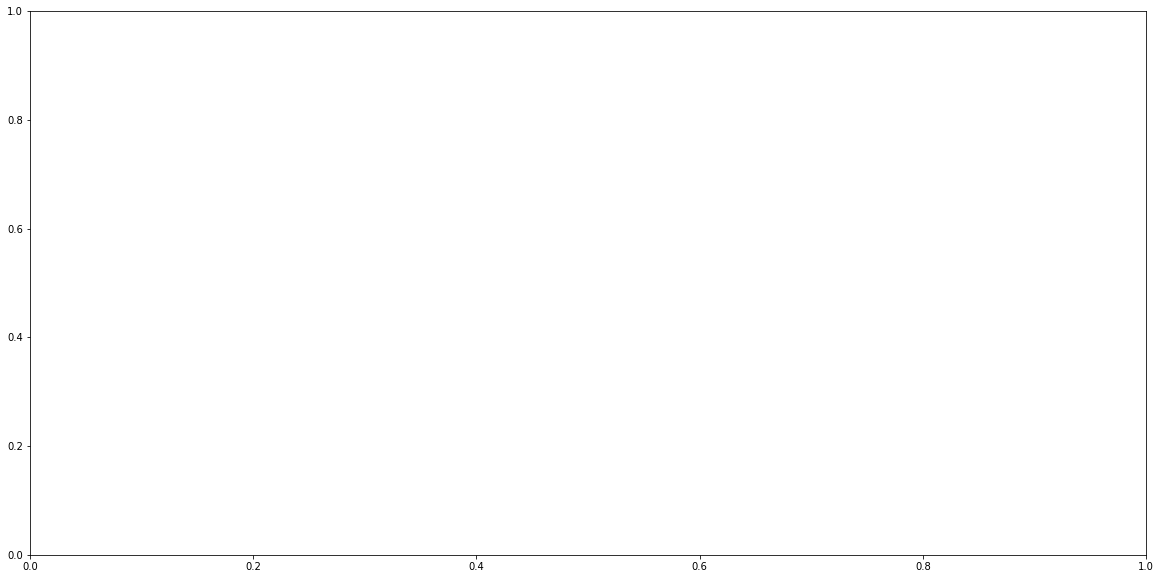

In [124]:
sns.set(font_scale=2)

<Figure size 432x288 with 0 Axes>

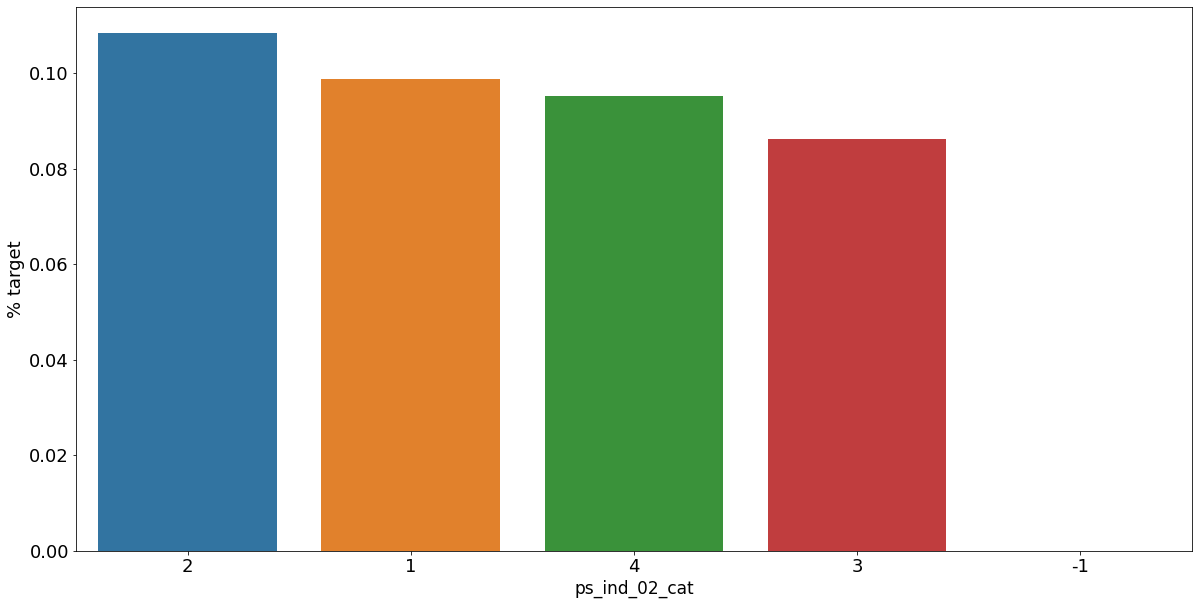

<Figure size 432x288 with 0 Axes>

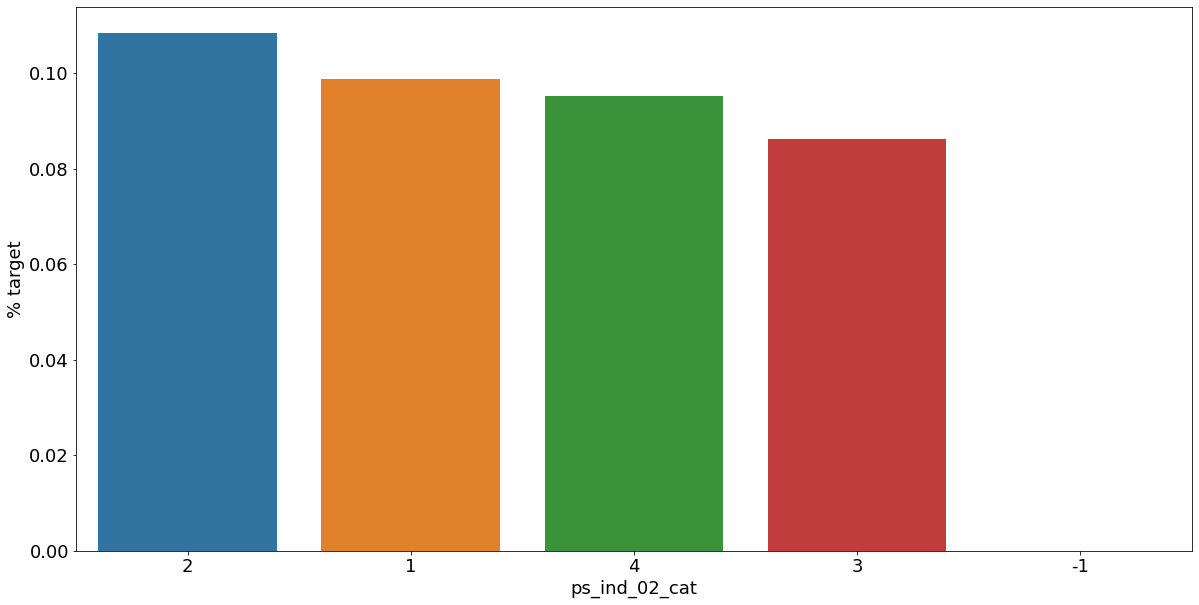

<Figure size 432x288 with 0 Axes>

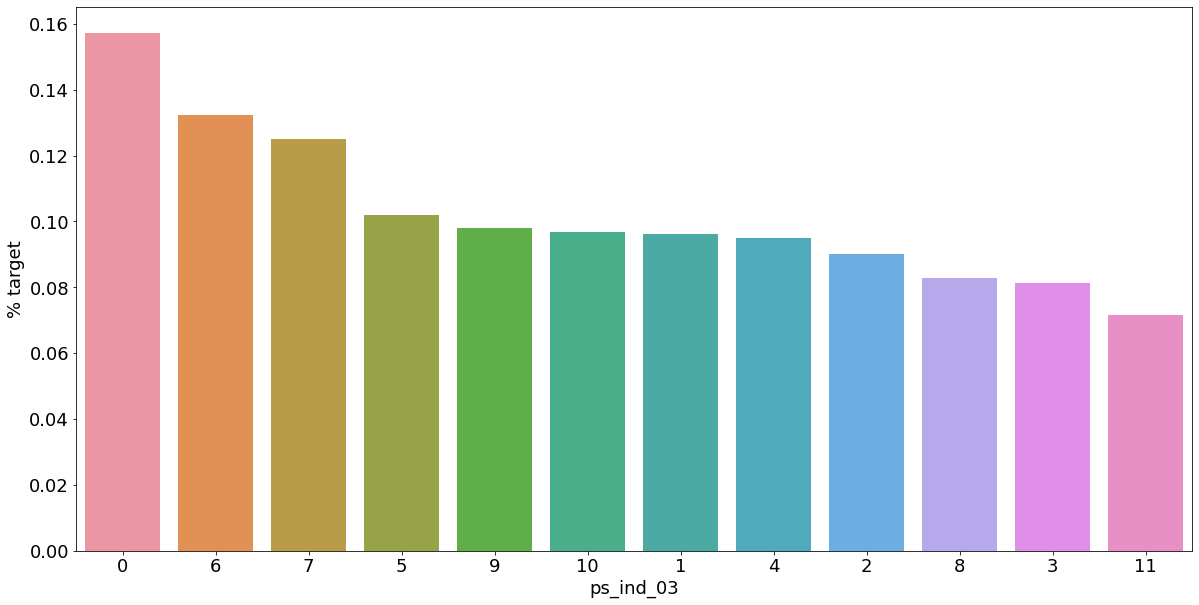

<Figure size 432x288 with 0 Axes>

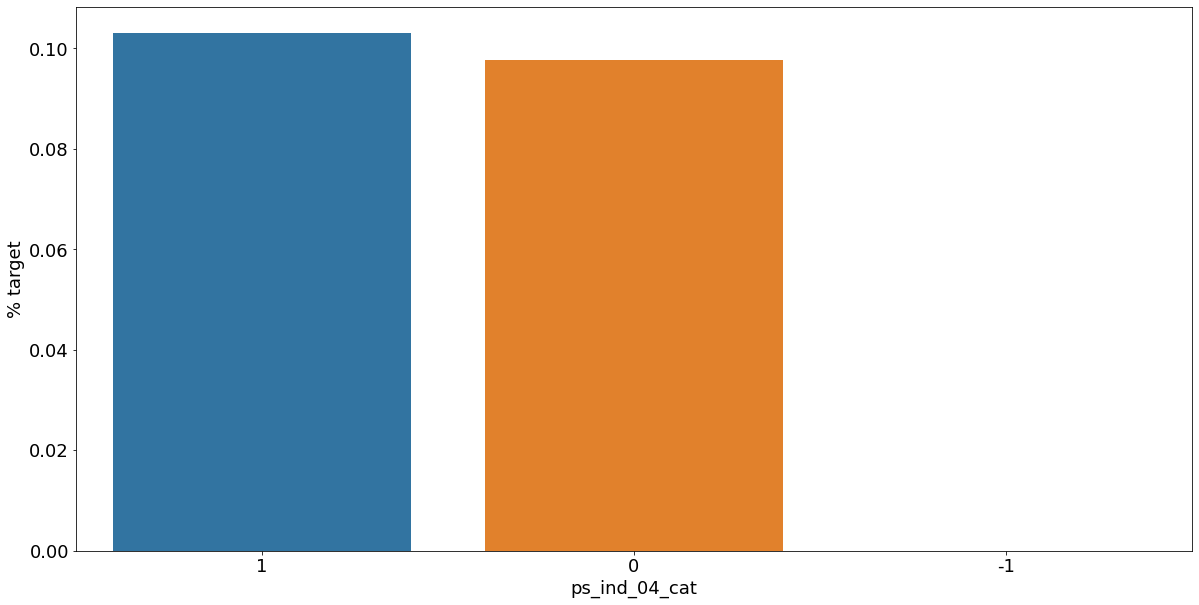

<Figure size 432x288 with 0 Axes>

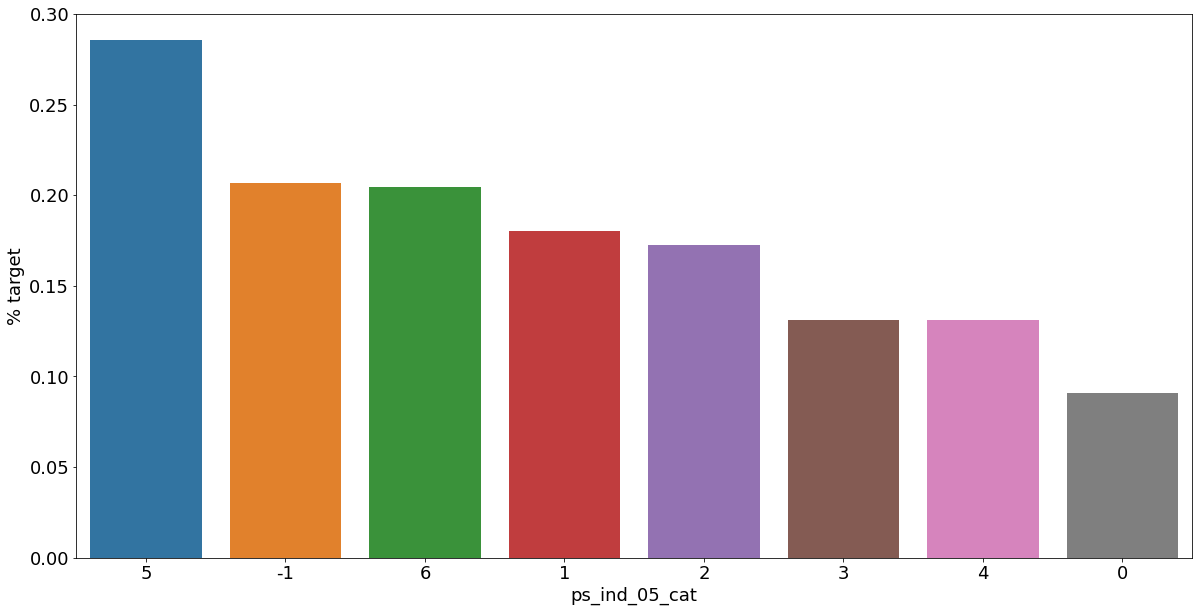

<Figure size 432x288 with 0 Axes>

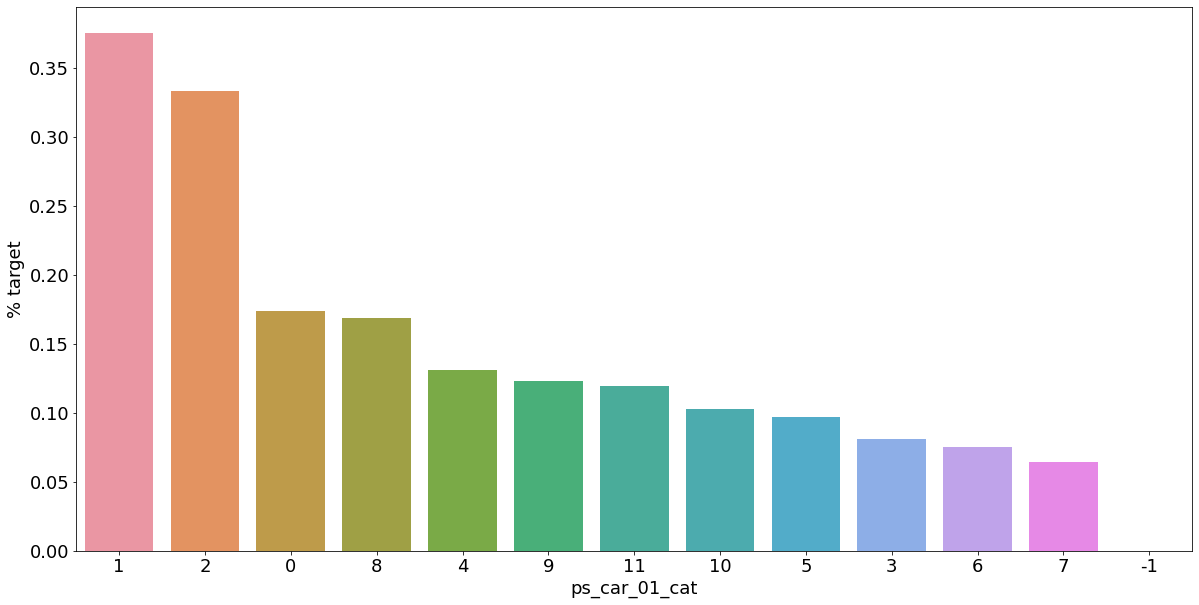

<Figure size 432x288 with 0 Axes>

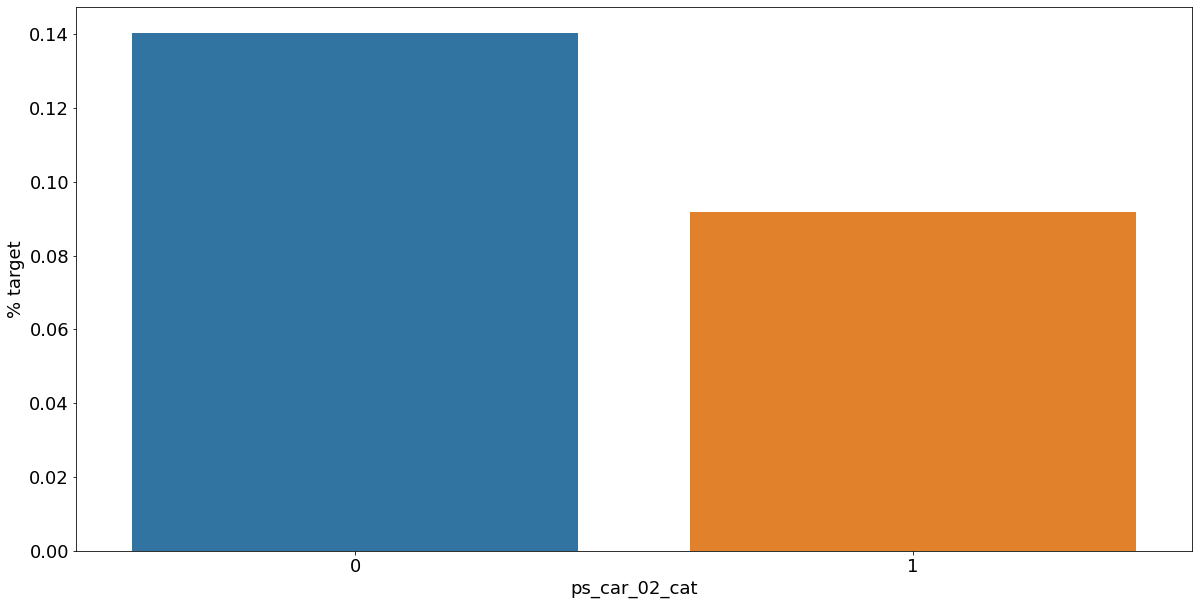

<Figure size 432x288 with 0 Axes>

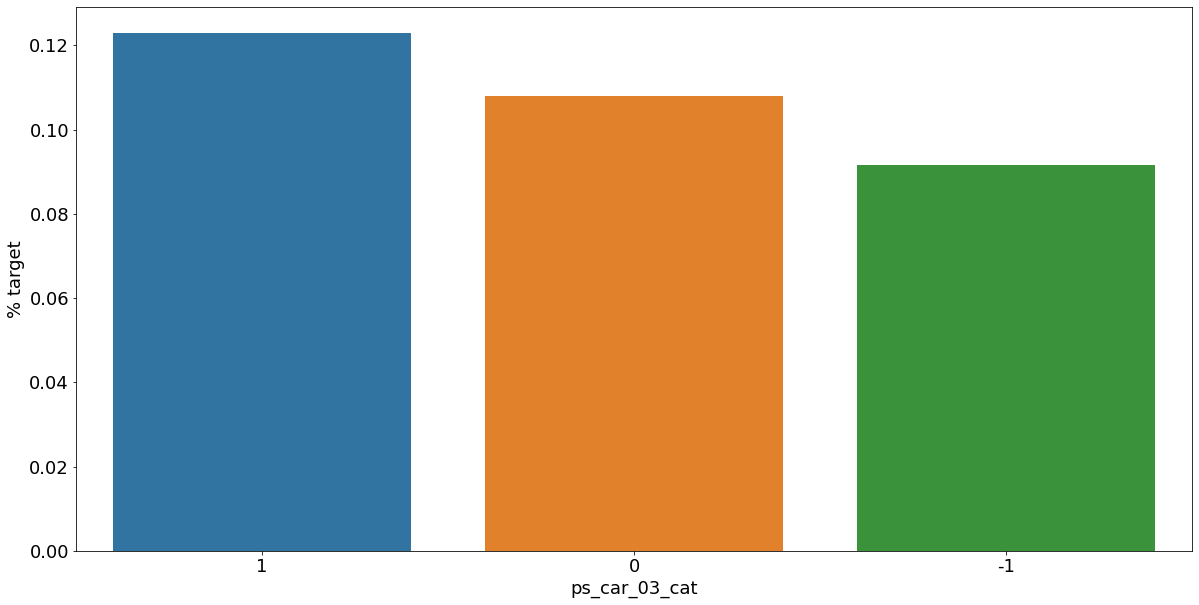

<Figure size 432x288 with 0 Axes>

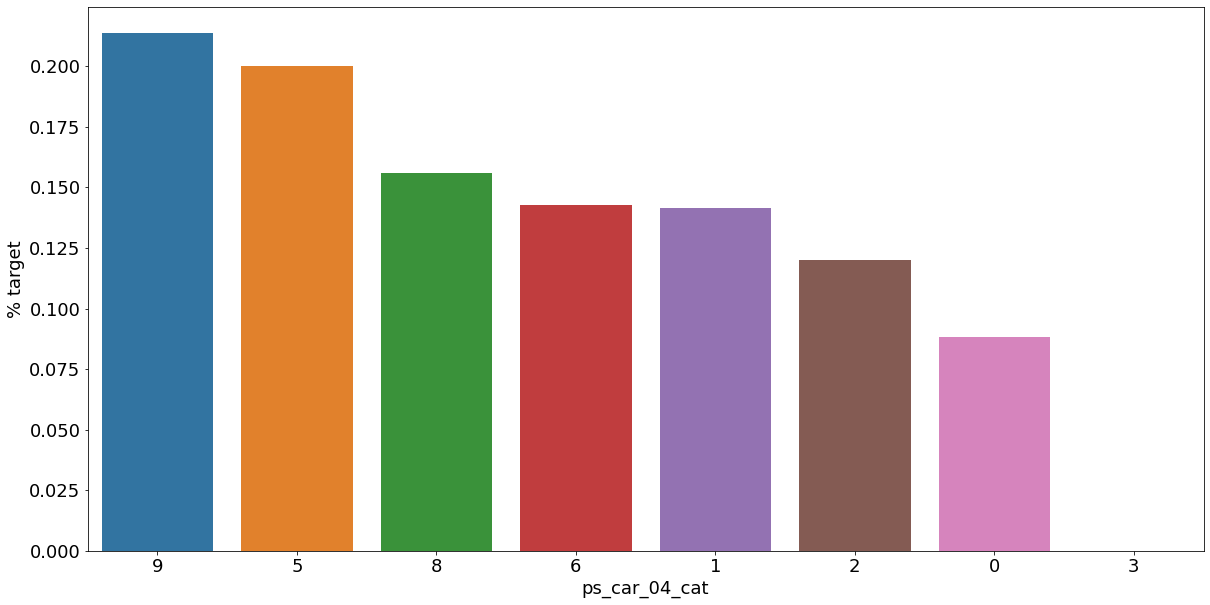

<Figure size 432x288 with 0 Axes>

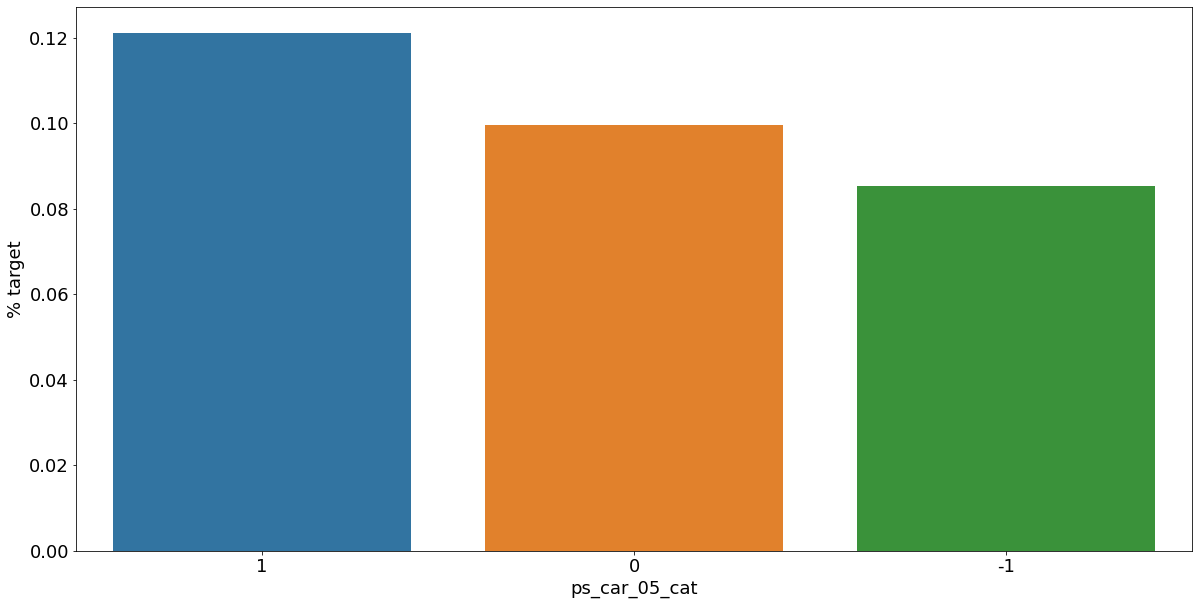

<Figure size 432x288 with 0 Axes>

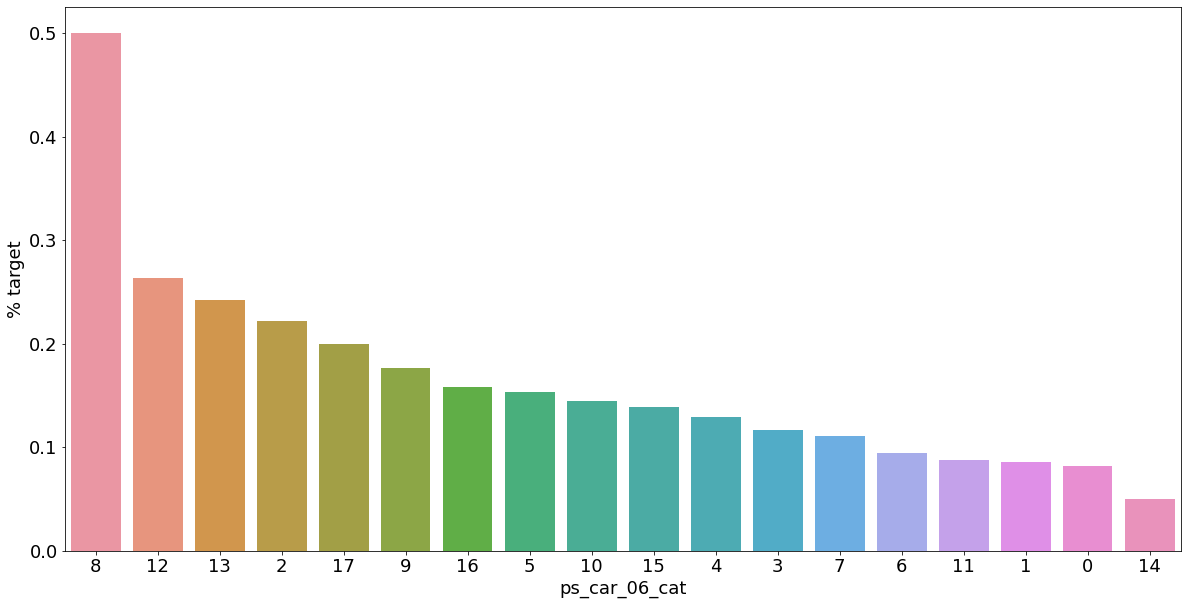

<Figure size 432x288 with 0 Axes>

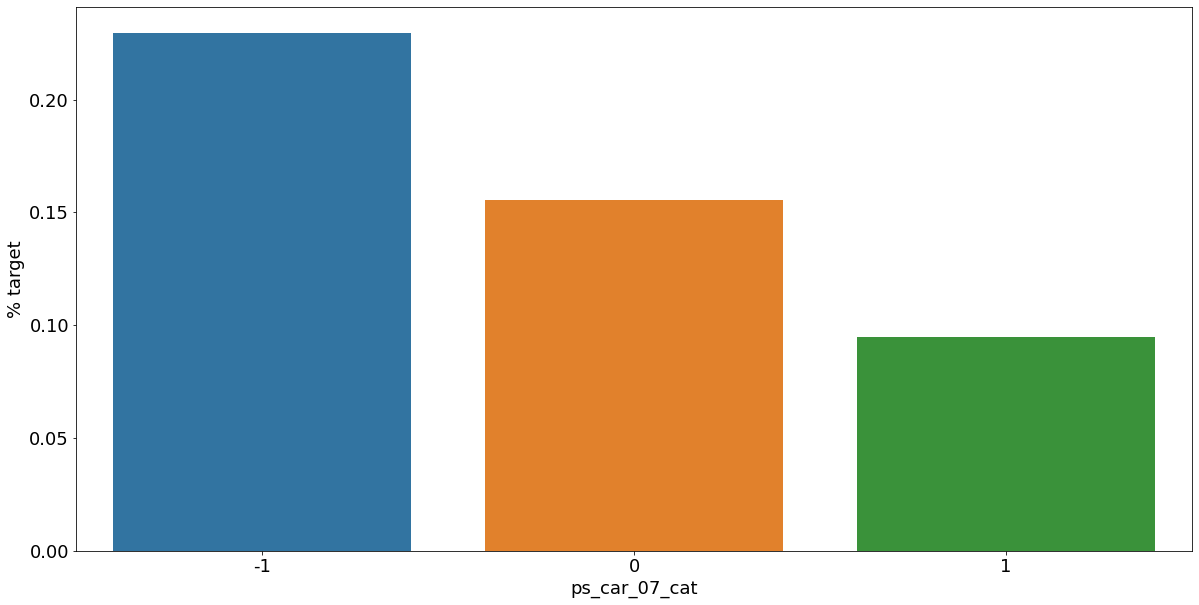

<Figure size 432x288 with 0 Axes>

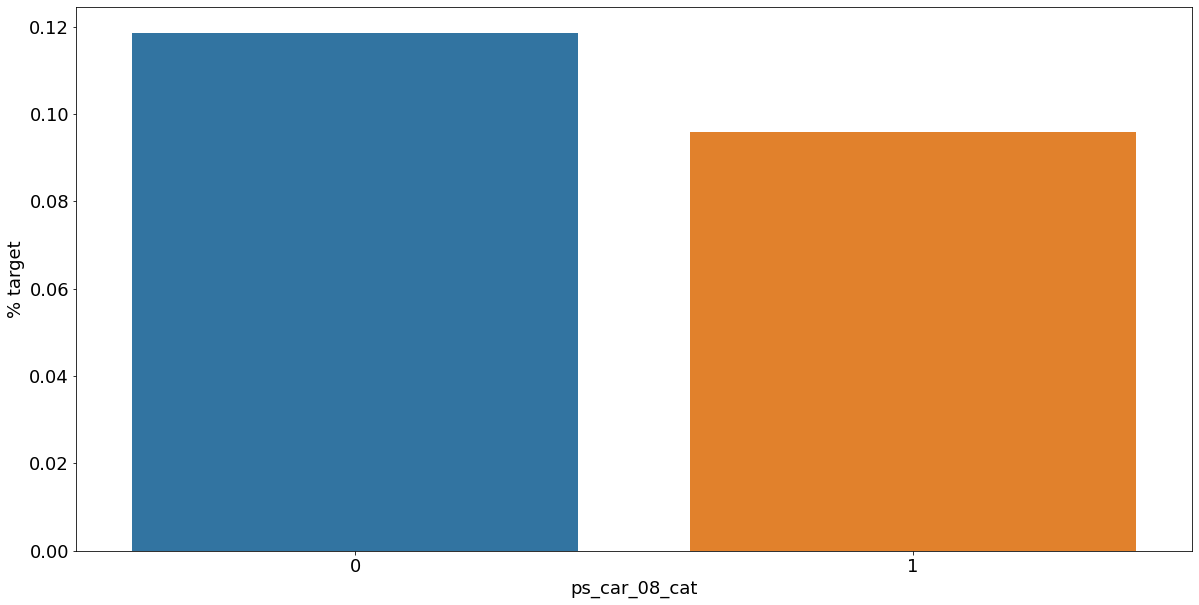

<Figure size 432x288 with 0 Axes>

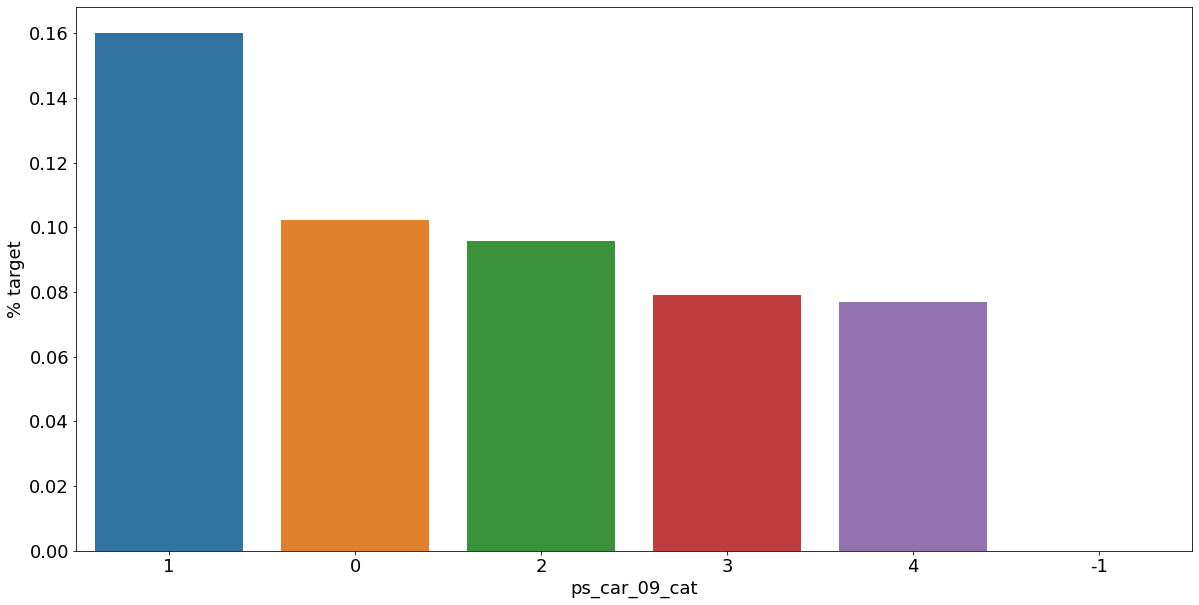

<Figure size 432x288 with 0 Axes>

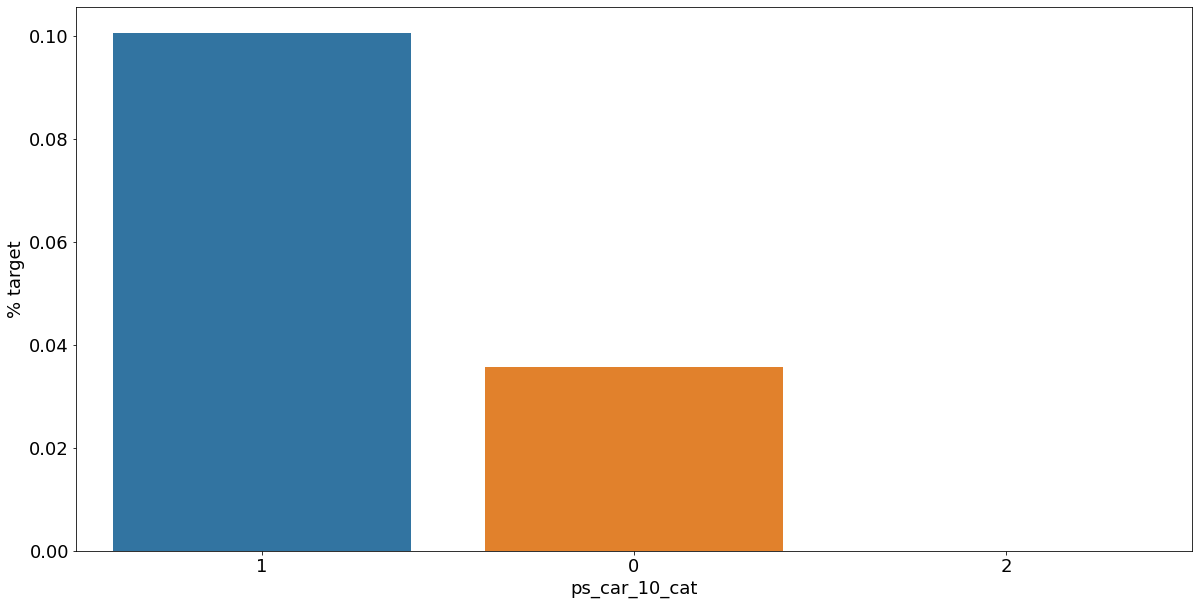

KeyError: "['ps_car_11_cat'] not in index"

<Figure size 432x288 with 0 Axes>

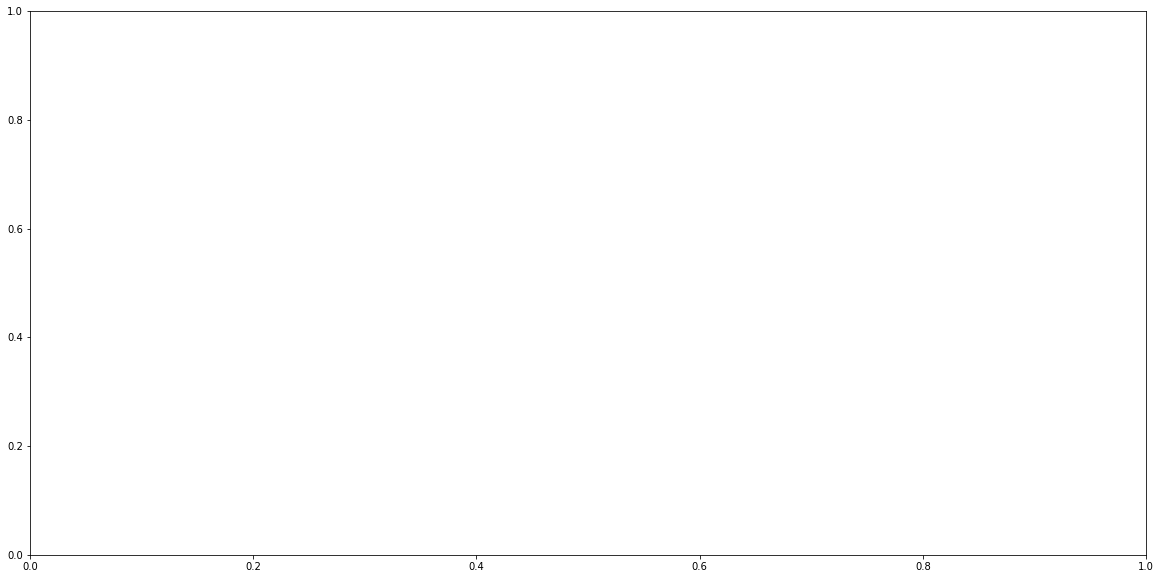

In [127]:
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [128]:
# 확률 확인할때는 count 확인할 것

# eda 귀찮아서 참고하는 경우 많아서 커널 메달 받기 좋다


NameError: name 'cat_persc' is not defined

In [ ]:
# As we can see from the variables with missing values, it is a good idesa to keep
#the missing values as a seperate . instead of replacing htem by the mod for instance



In [ ]:
# the cusomers with a missning values appear to have a much higher ( in some cases much lower)
#probability to ask for an insurace claim


# Interval variables

# Checking the correlation between interval variables. A heatmap is a good way to visualzize the correlation betweeen variables . The code below is based on an example buy Mi

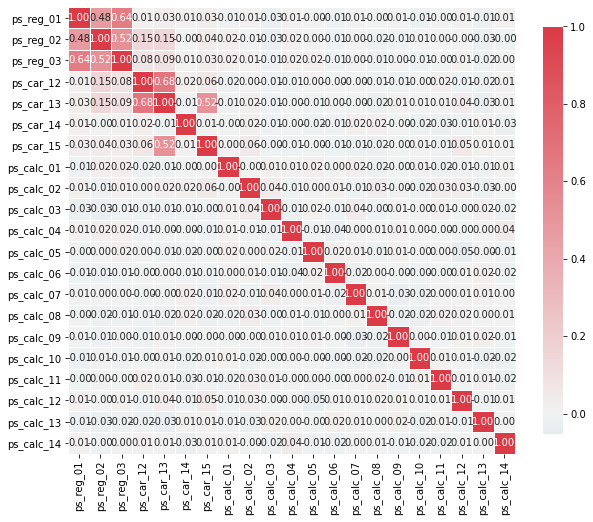

In [129]:
# fork 할떄 출처남기기
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
# squere 는 정사각형 annot 각 셀에 값표기유무
    # cbar_kws value mapping color bar shrink 옵션은 컬러바 크기 조절 vmax는 컬러바의 최대크기

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)


In [ ]:
# corr 시각화할때 heatmap 표현해주는것도  좋겠다


#correlations = train[v].corr()

#Create color map ranging between two colors
# select palette
#cmap =  sns.diverging_palette(220, 10 , as_cmap=True)


#fig , ax =  plt.subplots(figsize=(10,10 ))
# vmax 최대값 cneter  중앙값   , fmt 소수점
#sns.heatmap(correlations, cmap = cmap, vmax=1.0 , center =0, fmt='.2f'. square = True,linewidths=5)



In [ ]:
f = 'ps_car_02_cat '